Best F1 Score: 0.7204968944099378
Threshold: 0.10
EER: 0.1512244897959184
Optimal Threshold: 0.05


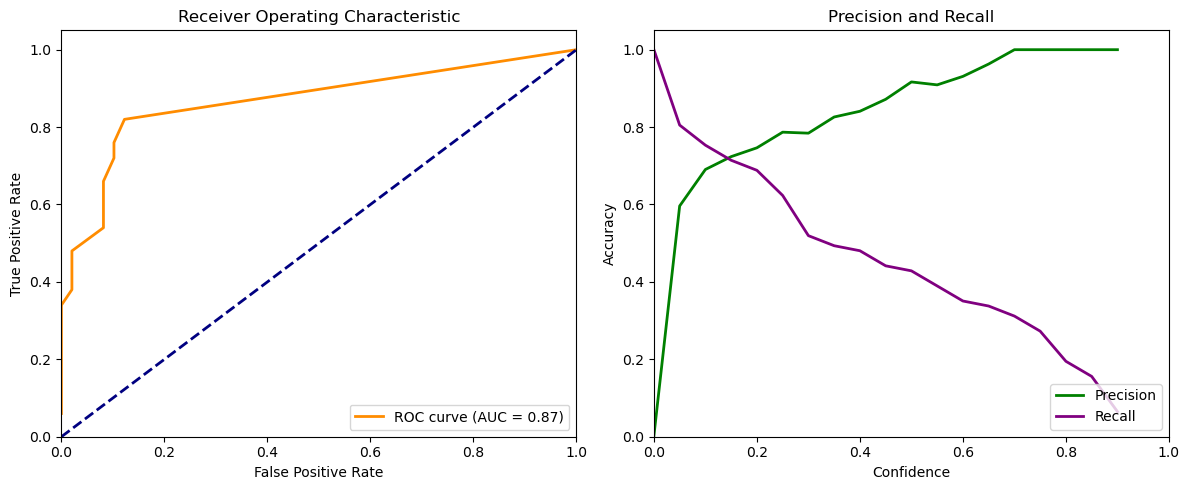

Best F1 Score: 0.7160493827160493
Threshold: 0.5
EER: 0.1814285714285714
Optimal Threshold: 0.05


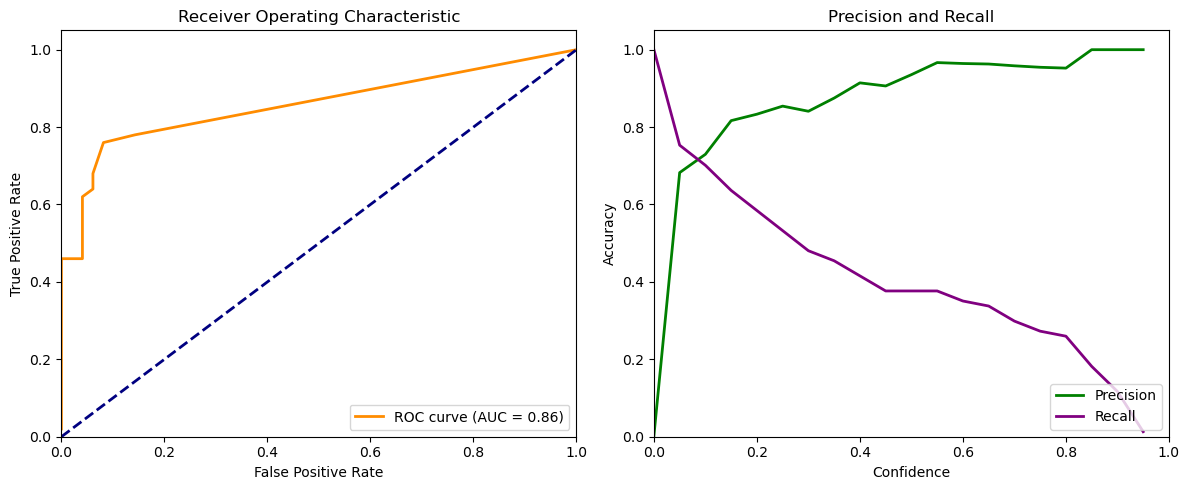

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

fpr_100 = [1.0,
 0.14285714285714285,
 0.08163265306122448,
 0.061224489795918366,
 0.061224489795918366,
 0.04081632653061224,
 0.04081632653061224,
 0.04081632653061224,
 0.04081632653061224,
 0.04081632653061224,
 0.02040816326530612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]
tpr_100 = [1.0,
 0.78,
 0.76,
 0.68,
 0.64,
 0.62,
 0.56,
 0.54,
 0.52,
 0.46,
 0.46,
 0.46,
 0.42,
 0.42,
 0.38,
 0.34,
 0.34,
 0.24,
 0.14,
 0.02]
recall_100 = [1.0,
 0.7532467532467533,
 0.7012987012987013,
 0.6363636363636364,
 0.5844155844155844,
 0.5324675324675324,
 0.4805194805194805,
 0.45454545454545453,
 0.4155844155844156,
 0.37662337662337664,
 0.37662337662337664,
 0.37662337662337664,
 0.35064935064935066,
 0.33766233766233766,
 0.2987012987012987,
 0.2727272727272727,
 0.2597402597402597,
 0.18181818181818182,
 0.11688311688311688,
 0.012987012987012988]
precision_100 = [0.0025925925925925925,
 0.6823529411764706,
 0.7297297297297297,
 0.8166666666666667,
 0.8333333333333334,
 0.8541666666666666,
 0.8409090909090909,
 0.875,
 0.9142857142857143,
 0.90625,
 0.9354838709677419,
 0.9666666666666667,
 0.9642857142857143,
 0.9629629629629629,
 0.9583333333333334,
 0.9545454545454546,
 0.9523809523809523,
 1.0,
 1.0,
 1.0]

fpr = [1.0,
 0.12244897959183673,
 0.10204081632653061,
 0.10204081632653061,
 0.10204081632653061,
 0.08163265306122448,
 0.08163265306122448,
 0.08163265306122448,
 0.061224489795918366,
 0.04081632653061224,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.02040816326530612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]
tpr = [1.0,
 0.82,
 0.76,
 0.74,
 0.72,
 0.66,
 0.56,
 0.54,
 0.52,
 0.5,
 0.48,
 0.42,
 0.4,
 0.38,
 0.34,
 0.32,
 0.22,
 0.16,
 0.06]
recall = [1.0,
 0.8051948051948052,
 0.7532467532467533,
 0.7142857142857143,
 0.6883116883116883,
 0.6233766233766234,
 0.5194805194805194,
 0.4935064935064935,
 0.4805194805194805,
 0.44155844155844154,
 0.42857142857142855,
 0.38961038961038963,
 0.35064935064935066,
 0.33766233766233766,
 0.3116883116883117,
 0.2727272727272727,
 0.19480519480519481,
 0.15584415584415584,
 0.06493506493506493]
precision = [0.0025925925925925925,
 0.5961538461538461,
 0.6904761904761905,
 0.7236842105263158,
 0.7464788732394366,
 0.7868852459016393,
 0.7843137254901961,
 0.8260869565217391,
 0.8409090909090909,
 0.8717948717948718,
 0.9166666666666666,
 0.9090909090909091,
 0.9310344827586207,
 0.9629629629629629,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
roc_auc = auc(fpr, tpr)
precision = np.array(precision)
recall = np.array(recall)
f1_scores = 2 * (precision * recall) / (precision + recall)
max_value = np.max(f1_scores)
max_index = np.argmax(f1_scores)*5
print(f"Best F1 Score: {max_value}")
print(f"Threshold: 0.{max_index}")
eer, optimal_threshold = calculate_eer_with_threshold(fpr, tpr)
print(f"EER: {eer}")
print(f"Optimal Threshold: {optimal_threshold}")

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic')
axes[0].legend(loc="lower right")

conf = [0.00, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9]  
axes[1].plot(conf, precision, color='green', lw=2, linestyle='-', label='Precision')
axes[1].plot(conf, recall, color='purple', lw=2, linestyle='-', label='Recall')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Confidence')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Precision and Recall')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

tpr = tpr_100
fpr = fpr_100
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
roc_auc = auc(fpr, tpr)
precision = np.array(precision_100)
recall = np.array(recall_100)
f1_scores = 2 * (precision * recall) / (precision + recall)
max_value = np.max(f1_scores)
max_index = np.argmax(f1_scores)*5
print(f"Best F1 Score: {max_value}")
print(f"Threshold: 0.{max_index}")
eer, optimal_threshold = calculate_eer_with_threshold(fpr, tpr)
print(f"EER: {eer}")
print(f"Optimal Threshold: {optimal_threshold}")

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic')
axes[0].legend(loc="lower right")

conf = [0.00, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95]  
axes[1].plot(conf, precision, color='green', lw=2, linestyle='-', label='Precision')
axes[1].plot(conf, recall, color='purple', lw=2, linestyle='-', label='Recall')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Confidence')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Precision and Recall')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


In [2]:
import numpy as np

def calculate_eer_with_threshold(fpr, tpr):
    thresholds = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
    frr = 1 - np.array(tpr)

    abs_diff = np.abs(fpr - frr)
    min_index = np.argmin(abs_diff)
    
    eer = (fpr[min_index] + frr[min_index]) / 2
    optimal_threshold = thresholds[min_index]
    
    return eer, optimal_threshold

   epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1          1.1940          2.3331          1.4907   
1      2          1.2499          1.9885          1.5379   
2      3          1.2695          2.0247          1.5618   
3      4          1.2766          1.9419          1.5626   
4      5          1.2160          1.8418          1.5269   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.60902            0.66960           0.66285   
1               0.58578            0.41128           0.45571   
2               0.63855            0.43524           0.50976   
3               0.59670            0.66715           0.65846   
4               0.73267            0.64351           0.71820   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.44449        1.1290        1.7878        1.5526  0.000195   
1              0.28720        1.3115        2.1246        1.7063  0.000387   
2              0.328

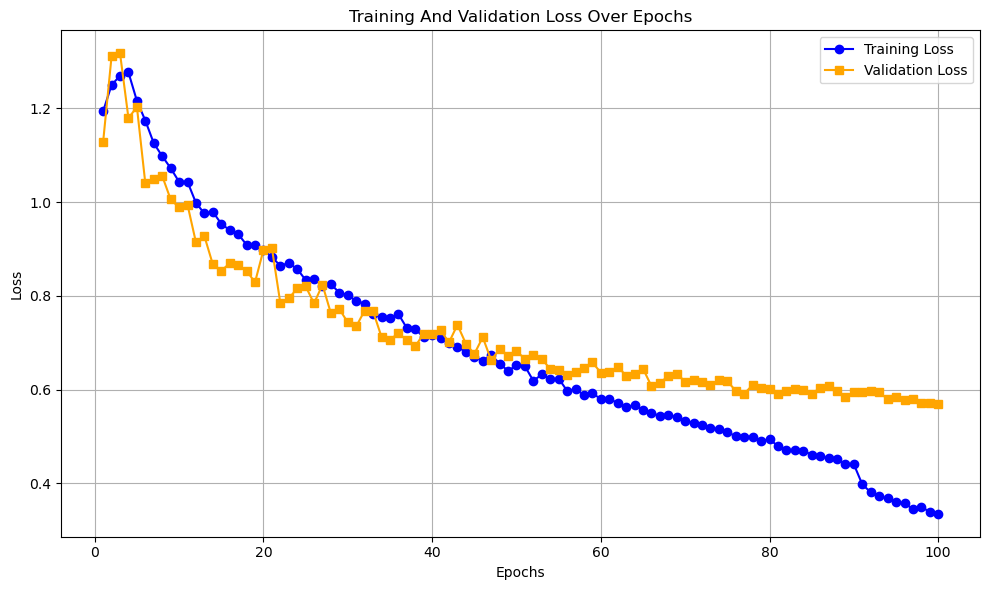

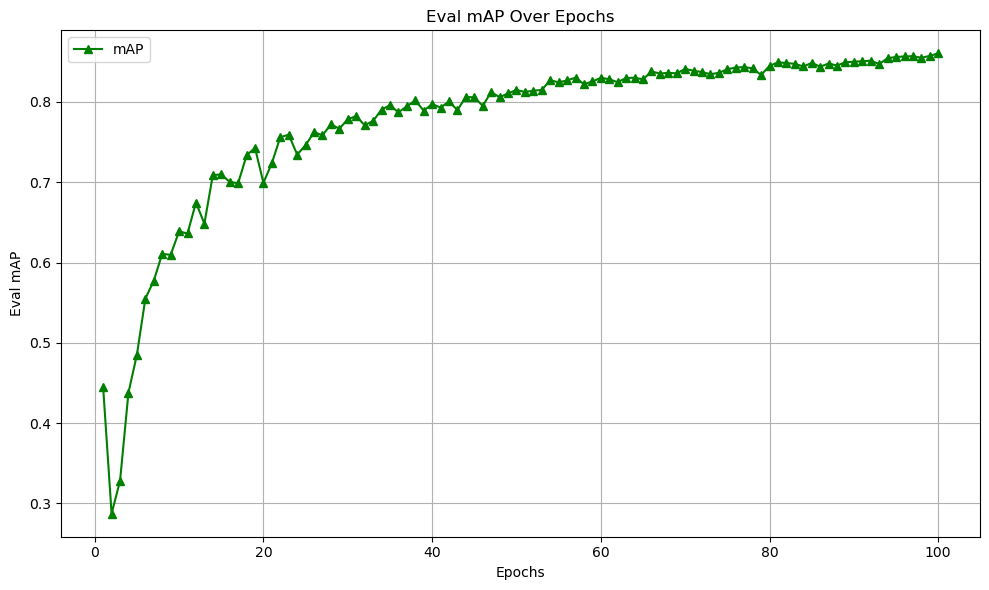

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_name = 'runs/detect/ALCOHOL_100/results.csv'
data = pd.read_csv(file_name)
data.columns = data.columns.str.strip()

# Check the first few rows to understand the data structure
print(data.head())

# Plotting loss and eval_loss on one plot
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data['train/box_loss'], label='Training Loss', marker='o', color='blue')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation Loss', marker='s', color='orange')

# Add titles and labels for the first plot
plt.title('Training And Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the first plot
plt.show()

# Plotting eval_map on a separate plot
plt.figure(figsize=(10, 6))
plt.plot(data['epoch'], data["metrics/mAP50-95(B)"], label = 'mAP', marker='^', color='green')

# Add titles and labels for the second plot
plt.title('Eval mAP Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Eval mAP')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the second plot
plt.show()

In [2]:
import pandas as pd

# Load the training log
results = pd.read_csv('runs/detect/ALCOHOL_100/results.csv')

# Strip spaces
results.columns = results.columns.str.strip()

# Calculate fitness
results["fitness"] = results["metrics/mAP50-95(B)"]

print(max(results["fitness"]))

# Find the epoch with the highest fitness
best_epoch = results['fitness'].idxmax() + 1

print(f"Best model was saved at epoch: {best_epoch}")

0.86058
Best model was saved at epoch: 100
